In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

In [2]:
df = pd.read_csv('cleaned_df.csv')
df.head()

,Price,Regionname,MonthsSince2016,BuildingAge,Landsize,BuildingArea,Lattitude,Longtitude,Type,Rooms,Distance,Bathroom,Car
0,1035000.0,Northern Metropolitan,2,116,156,79.0,-37.8079,144.9934,h,2,2.5,1,0
1,1465000.0,Northern Metropolitan,15,117,134,150.0,-37.8093,144.9944,h,3,2.5,2,0
2,1600000.0,Northern Metropolitan,6,2,120,142.0,-37.8072,144.9941,h,4,2.5,1,2
3,1876000.0,Northern Metropolitan,5,106,245,210.0,-37.8024,144.9993,h,3,2.5,2,0
4,1636000.0,Northern Metropolitan,10,126,256,107.0,-37.8060,144.9954,h,2,2.5,1,2


In [3]:
df = pd.get_dummies(df, columns=["Regionname", "Type"], drop_first=True)

In [4]:
Price = df.loc[:,['Price']]
Price.describe()

,Price
count,6.835000e+03
mean,1.067740e+06
std,6.282394e+05
min,1.310000e+05
25%,6.300000e+05
50%,8.900000e+05
75%,1.330500e+06
max,4.850000e+06


In [5]:
X = df.drop(columns = ["Price"])
y = np.log(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X.describe()

,MonthsSince2016,BuildingAge,Landsize,BuildingArea,Lattitude,Longtitude,Rooms,Distance,Bathroom,Car,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_t,Type_u
count,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000
mean,13.054572,52.229993,486.682078,142.210537,-37.807979,144.991749,2.972787,10.132012,1.588881,1.597805,0.004097,0.294952,0.003804,0.031017,0.337820,0.225165,0.002926,0.093782,0.223555
std,5.375873,37.736976,916.454623,80.026629,0.079975,0.104904,0.967041,5.998009,0.708322,0.945498,0.063878,0.456055,0.061563,0.173376,0.473001,0.417721,0.054018,0.291547,0.416658
min,2.000000,0.000000,0.000000,0.000000,-38.164920,144.542370,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,17.000000,165.000000,93.000000,-37.856740,144.925595,2.000000,6.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,47.000000,401.000000,125.000000,-37.802100,144.996700,3.000000,9.200000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,76.000000,640.000000,172.000000,-37.756945,145.056000,4.000000,13.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,21.000000,821.000000,37000.000000,1041.000000,-37.408530,145.526350,8.000000,47.400000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
MAE = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
RMSE = math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print('MAE (Random Forest):', MAE)
print("R-squared:", RFR.score(X_test, y_test))

MAE (Random Forest): 148529.94083719657
R-squared: 0.8804821539918847


/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


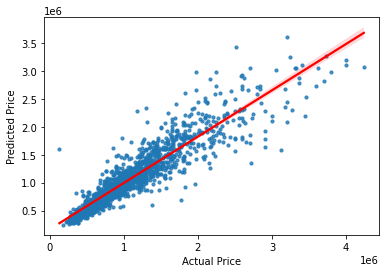

In [8]:
sns.regplot(np.exp(y_test), np.exp(y_pred), scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

REG = LinearRegression()
REG.fit(X_train, y_train)
y_REG_pred = REG.predict(X_test)

MAE_REG = mean_absolute_error(np.exp(y_test), np.exp(y_REG_pred))
RMSE_REG = math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_REG_pred)))

print('MAE (Linear Regression):', MAE_REG)
print("R-squared:", REG.score(X_test, y_test))

MAE (Linear Regression): 207100.19412600272
R-squared: 0.7721138153607434


/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


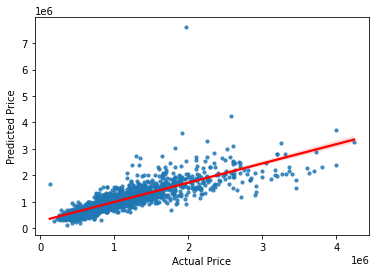

In [10]:
sns.regplot(np.exp(y_test), np.exp(y_REG_pred), scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")
plt.show()